<a href="https://colab.research.google.com/github/AndruGiral2020/Data_Science_Basic/blob/main/Calculo_intervalo_de_confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importamos librerias para al análisis ###

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import scipy.stats as st

### Generamos una distribución de datos ###

In [22]:
np.random.seed(20) 
var1 = np.random.randint(0, 10, 30) # Días de vacaciones
var2 = var1+np.random.normal(0, 1, 30) # Dinero gastado


In [23]:
var1

array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5, 3, 0, 6, 6, 0, 9, 5, 7, 5, 2, 6, 9,
       3, 3, 9, 0, 6, 2, 3, 1])

In [24]:
var2

array([ 2.00357394,  7.8346978 ,  5.30970062,  6.32287203,  7.64708367,
        1.50052211, -0.38030095,  7.60136877,  7.78333092,  4.23669765,
        4.4667905 , -0.45362263,  6.65496734,  6.9013109 , -1.01687734,
        7.78419102,  4.35079885,  6.58583137,  5.28375927,  1.90496523,
        5.90299341,  8.85037898,  5.00500464,  0.91526532, 10.25170782,
       -1.02567366,  4.65791506,  3.52216482,  2.78547908,  1.85719851])

#### Visualización de resultados con un intervalo de confianza del 80%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


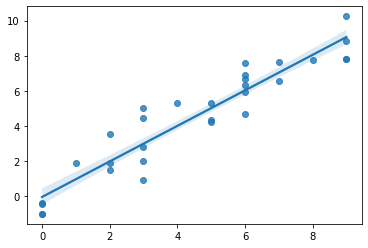

In [25]:
grafico = sns.regplot(var1, var2, ci=80)

In [26]:
# Unimos las variables var1 y var2 (estamos creando un tuple) a partir de zip
tuple = list(zip(var1, var2))
tuple

[(3, 2.00357393584439),
 (9, 7.834697802299647),
 (4, 5.30970061913965),
 (6, 6.3228720313002285),
 (7, 7.64708366552359),
 (2, 1.5005221128135084),
 (0, -0.38030095013666737),
 (6, 7.601368765314202),
 (8, 7.783330917592267),
 (5, 4.236697654801888),
 (3, 4.46679050446485),
 (0, -0.4536226341087731),
 (6, 6.654967339145165),
 (6, 6.9013108953147135),
 (0, -1.0168773429029372),
 (9, 7.784191021915653),
 (5, 4.350798850570943),
 (7, 6.58583137359131),
 (5, 5.283759265056479),
 (2, 1.9049652273236624),
 (6, 5.902993413143072),
 (9, 8.850378980084015),
 (3, 5.0050046388210205),
 (3, 0.915265319342021),
 (9, 10.251707823079435),
 (0, -1.02567365808793),
 (6, 4.657915055693322),
 (2, 3.522164815397617),
 (3, 2.7854790790728603),
 (1, 1.857198512656195)]

In [27]:
# Transformamos el tuple a un data frame a partir de DataFrame
tabla = pd.DataFrame(tuple,
                  columns = ['Días_vacaciones', 'Dinero_gastado'])
tabla

,Días_vacaciones,Dinero_gastado
0,3,2.003574
1,9,7.834698
2,4,5.309701
3,6,6.322872
4,7,7.647084
5,2,1.500522
6,0,-0.380301
7,6,7.601369
8,8,7.783331
9,5,4.236698


In [28]:
# Calcula los intervalos de confianza a un 95% para ambas variables
st.t.interval(alpha=0.95, df=len(tabla)-1, loc=np.mean(tabla), scale=st.sem(tabla)) 

(array([3.41798835, 3.3392682 ]), array([5.58201165, 5.66367146]))

In [31]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)

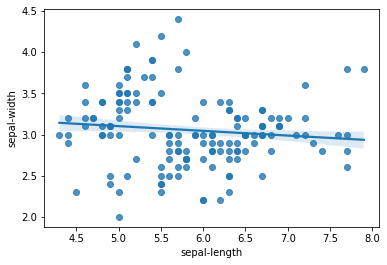

In [36]:
grafico1 = sns.regplot(x='sepal-length', y= 'sepal-width', data = iris, ci=80)

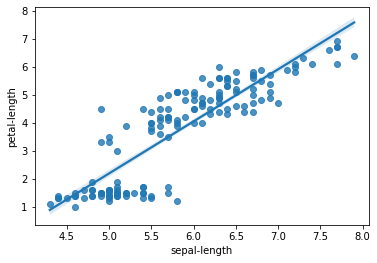

In [38]:
grafico2 = sns.regplot(x='sepal-length', y= 'petal-length', data = iris, ci=80)

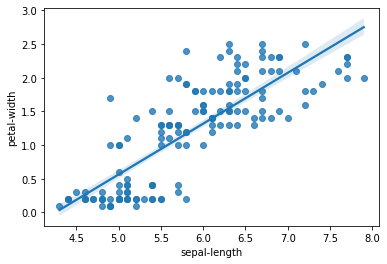

In [39]:
grafico2 = sns.regplot(x='sepal-length', y= 'petal-width', data = iris, ci=80)

In [43]:
# Calcula los intervalos de confianza a un 95% para ambas variables
def intervalo_de_confianza(iris, alpha):
    resultado = st.norm.interval(alpha = alpha, loc=np.mean(iris), scale=st.sem(iris))
    print(f'Intervalo de confianza de datos con alpha {alpha}: {resultado}')
    

intervalo_de_confianza(tabla, 0.95)
intervalo_de_confianza(tabla, 0.99) 

Intervalo de confianza de datos con alpha 0.95: (array([3.46309744, 3.38772041]), array([5.53690256, 5.61521926]))
Intervalo de confianza de datos con alpha 0.99: (array([3.13727904, 3.03775498]), array([5.86272096, 5.96518469]))
